In [15]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set some styling for seaborn visuals
sns.set(style="whitegrid")

# Step 2: Load the dataset
df = pd.read_csv("D:\\Aakif\\Unemployment_Rate_upto_11_2020.csv")

# Step 3: Preview the first few rows
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [16]:
# Check basic structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [17]:
# See column names and summary stats
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [18]:
# Step 2.1: Clean column names
df.rename(columns={
    ' Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    ' Estimated Employed': 'Employed',
    ' Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate',
    ' Region.1': 'Region_Type',
    ' Date': 'Date',
    ' Frequency': 'Frequency',
    'longitude': 'Longitude',
    'latitude': 'Latitude'
}, inplace=True)

# Step 2.2: Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Step 2.3: Extract month and year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Preview cleaned dataframe
df.head()

C:\Users\Faizal\AppData\Local\Temp\ipykernel_22104\803713426.py:14: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


,Region,Date,Frequency,Unemployment_Rate,Employed,Labour_Participation_Rate,Region.1,Longitude,Latitude,Month,Year
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,2020
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,2020
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,2020
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,2020
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,2020


In [19]:
# Overall average unemployment rate
avg_unemp = df['Unemployment_Rate'].mean()
print(f"📊 Average Unemployment Rate in India (Jan–Nov 2020): {avg_unemp:.2f}%")

# Overall highest unemployment
max_row = df[df['Unemployment_Rate'] == df['Unemployment_Rate'].max()]
print("\n🔺 Highest unemployment recorded:\n")
print(max_row[['Region', 'Date', 'Unemployment_Rate']])

📊 Average Unemployment Rate in India (Jan–Nov 2020): 12.24%

🔺 Highest unemployment recorded:

         Region       Date  Unemployment_Rate
172  Puducherry 2020-04-30              75.85


In [20]:
# Average unemployment by state (Region)
state_avg = df.groupby('Region')['Unemployment_Rate'].mean().sort_values(ascending=False)
print("📍 Average Unemployment Rate by State:\n")
print(state_avg)

📍 Average Unemployment Rate by State:

Region
Haryana             27.477000
Tripura             25.055000
Jharkhand           19.539000
Bihar               19.471000
Delhi               18.414000
Puducherry          17.942000
Jammu & Kashmir     16.477778
Himachal Pradesh    16.065000
Rajasthan           15.868000
Tamil Nadu          12.187000
Goa                 12.167000
Punjab              11.981000
Uttarakhand         11.156000
West Bengal         10.192000
Sikkim               9.792500
Uttar Pradesh        9.737000
Kerala               9.434000
Andhra Pradesh       8.664000
Maharashtra          7.979000
Chhattisgarh         7.819000
Karnataka            7.668000
Madhya Pradesh       6.854000
Telangana            6.833000
Odisha               6.462000
Gujarat              6.376000
Assam                4.856000
Meghalaya            3.866000
Name: Unemployment_Rate, dtype: float64


C:\Users\Faizal\AppData\Local\Temp\ipykernel_22104\4277471250.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Month', y='Unemployment_Rate', ci=None)


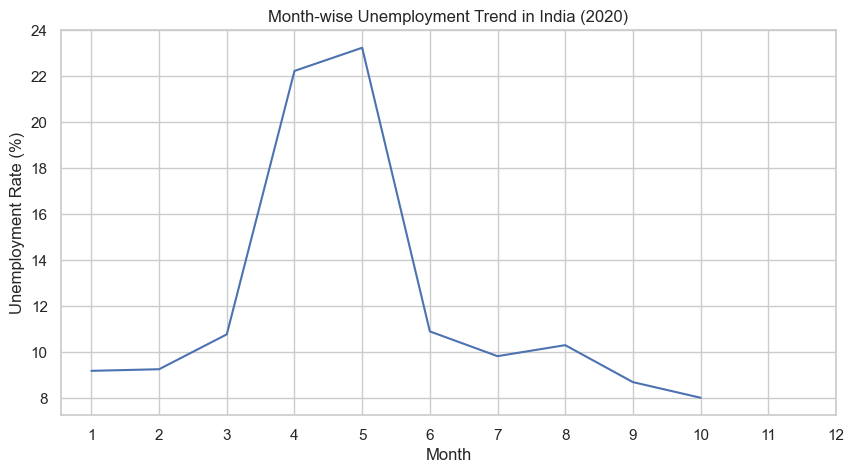

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lineplot of month-wise average unemployment
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Month', y='Unemployment_Rate', ci=None)
plt.title("Month-wise Unemployment Trend in India (2020)")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(range(1, 13))
plt.show()

C:\Users\Faizal\AppData\Local\Temp\ipykernel_22104\2998767423.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg.index, y=state_avg.values, palette='rocket')
C:\Users\Faizal\AppData\Local\Temp\ipykernel_22104\2998767423.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Faizal\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


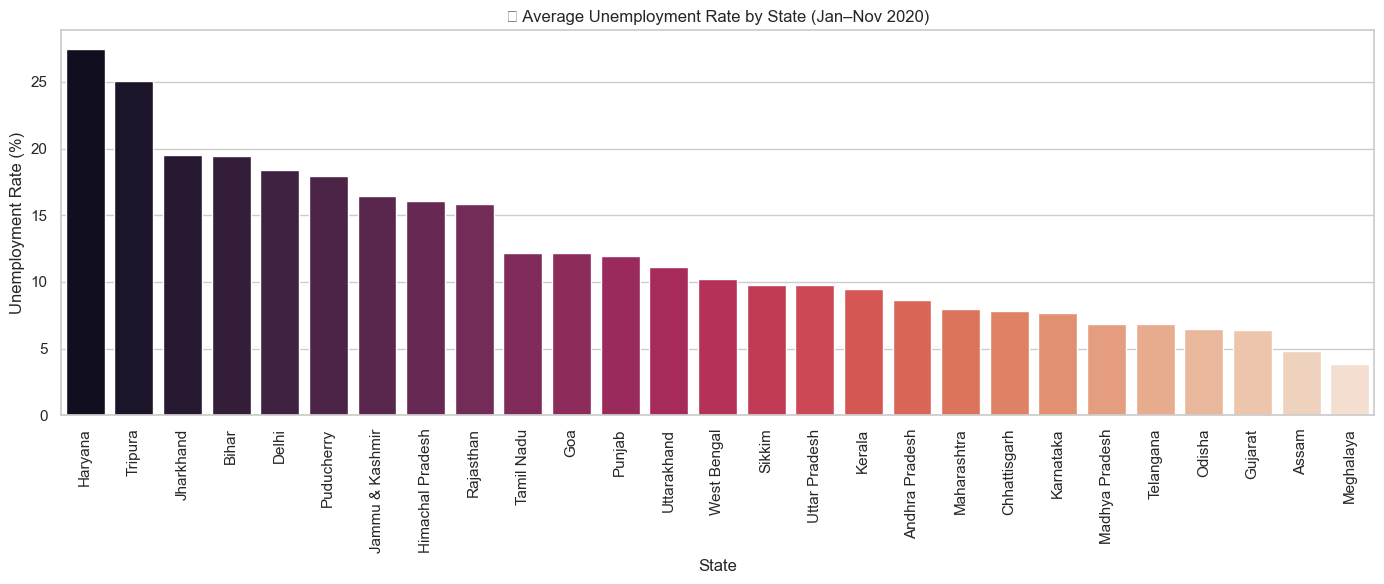

In [23]:
plt.figure(figsize=(14, 6))
state_avg = df.groupby('Region')['Unemployment_Rate'].mean().sort_values(ascending=False)

sns.barplot(x=state_avg.index, y=state_avg.values, palette='rocket')
plt.xticks(rotation=90)
plt.title("📊 Average Unemployment Rate by State (Jan–Nov 2020)")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("State")
plt.tight_layout()
plt.show()

In [27]:
df.rename(columns={
    'Region.1': 'Region_Type'
}, inplace=True)


C:\Users\Faizal\AppData\Local\Temp\ipykernel_22104\182295394.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region_Type', y='Unemployment_Rate', data=df, palette='Set2')


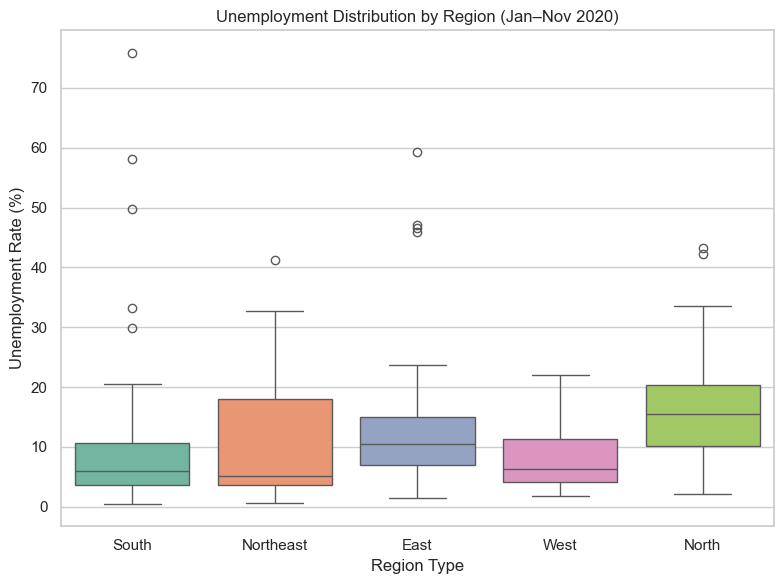

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Region_Type', y='Unemployment_Rate', data=df, palette='Set2')
plt.title("Unemployment Distribution by Region (Jan–Nov 2020)")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Region Type")
plt.tight_layout()
plt.show()

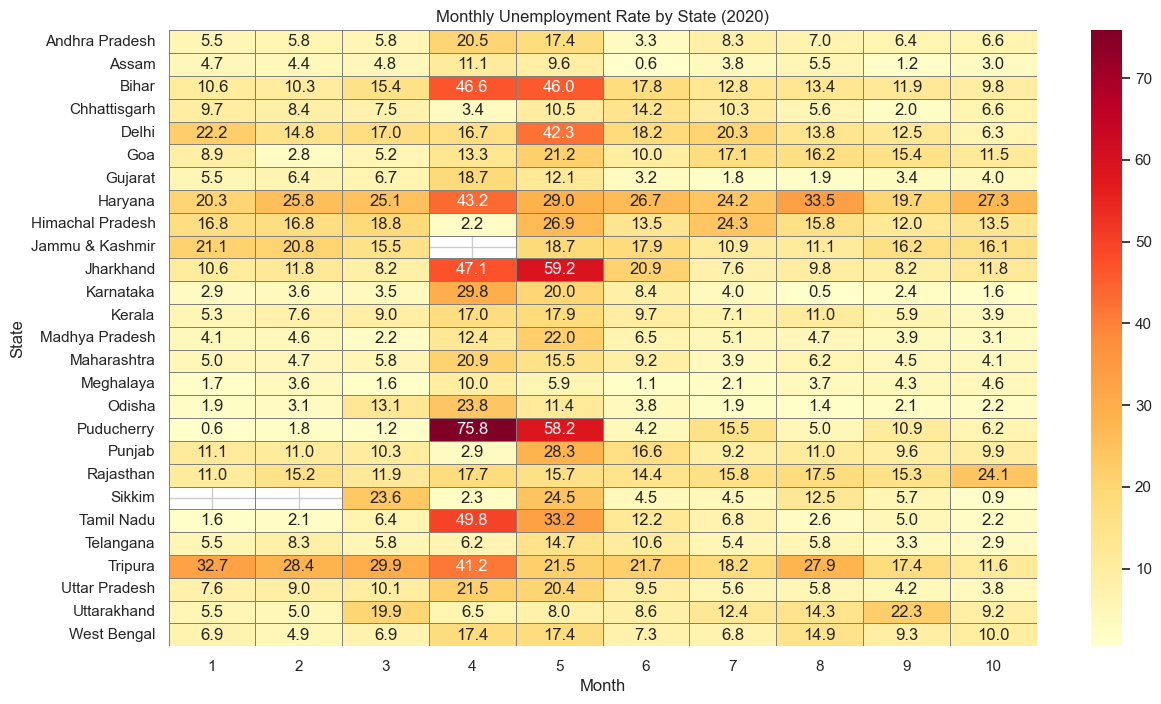

In [30]:
# Create pivot table
pivot = df.pivot_table(values='Unemployment_Rate', index='Region', columns='Month', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot, cmap='YlOrRd', linewidths=0.5, linecolor='gray', annot=True, fmt=".1f")
plt.title("Monthly Unemployment Rate by State (2020)")
plt.ylabel("State")
plt.xlabel("Month")
plt.show()


C:\Users\Faizal\AppData\Local\Temp\ipykernel_22104\385816479.py:8: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Faizal\AppData\Local\Temp\ipykernel_22104\385816479.py:8: UserWarning: Glyph 128274 (\N{LOCK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Faizal\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Faizal\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128274 (\N{LOCK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


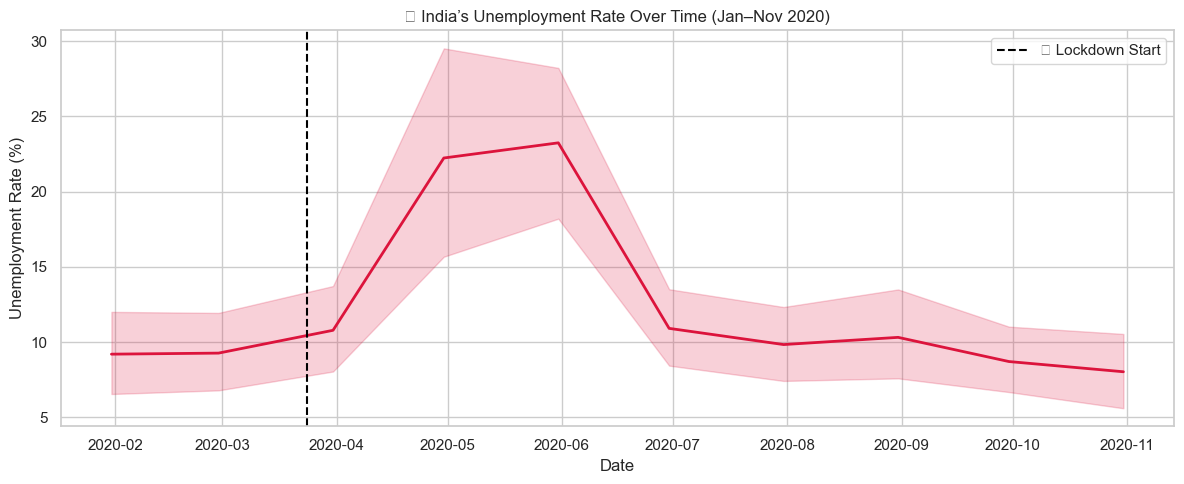

In [32]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='Date', y='Unemployment_Rate', color='crimson', linewidth=2)
plt.axvline(pd.to_datetime('2020-03-24'), color='black', linestyle='--', label='🔒 Lockdown Start')
plt.title("📈 India’s Unemployment Rate Over Time (Jan–Nov 2020)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.tight_layout()
plt.show()

In [33]:
# Before and after lockdown average unemployment
pre_lockdown = df[df['Date'] < '2020-03-24']['Unemployment_Rate'].mean()
post_lockdown = df[df['Date'] >= '2020-03-24']['Unemployment_Rate'].mean()

print(f"🟢 Average Unemployment Before Lockdown: {pre_lockdown:.2f}%")
print(f"🔴 Average Unemployment After Lockdown: {post_lockdown:.2f}%")

🟢 Average Unemployment Before Lockdown: 9.23%
🔴 Average Unemployment After Lockdown: 12.96%


C:\Users\Faizal\AppData\Local\Temp\ipykernel_22104\1911268675.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Faizal\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


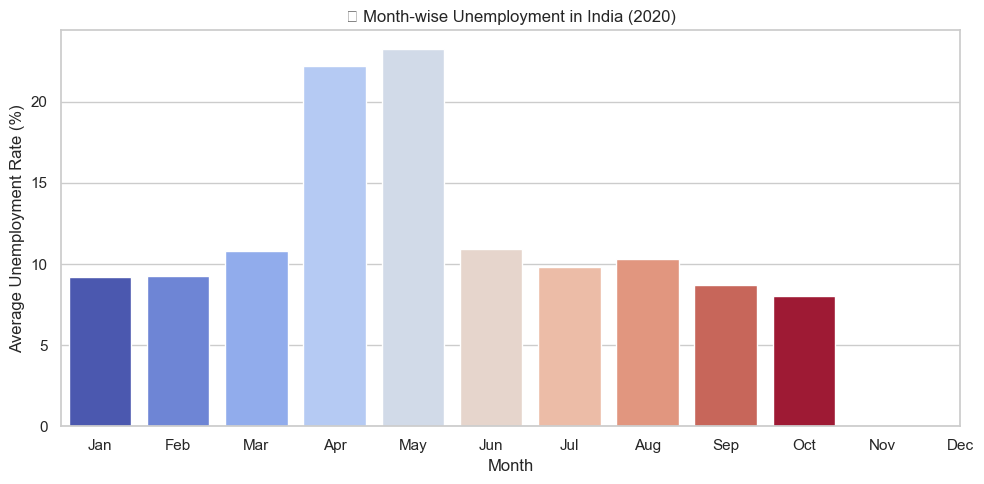

In [46]:
monthly_avg = df.groupby('Month')['Unemployment_Rate'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, hue=monthly_avg.index, palette='coolwarm', legend=False)
plt.title("📊 Month-wise Unemployment in India (2020)")
plt.xlabel("Month")
plt.ylabel("Average Unemployment Rate (%)")
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.tight_layout()
plt.show()